## 音效特徵提取

https://ppfocus.com/0/dib40309d.html

In [2]:
!pip install librosa

  Using cached resampy-0.2.2.tar.gz (323 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


You should consider upgrading via the 'C:\Users\jiao\anaconda3\python.exe -m pip install --upgrade pip' command.


  Using cached audioread-2.1.9.tar.gz (377 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached SoundFile-0.10.3.post1-py2.py3.cp26.cp27.cp32.cp33.cp34.cp35.cp36.pp27.pp32.pp33-none-win_amd64.whl (689 kB)
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Created wheel for audioread: filename=audioread-2.1.9-py3-none-any.whl size=23153 sha256=db96dabc92f3ed33d7fcb7b678025eb57e749e681e2c08ef0de70106bba6463f
  Stored in directory: c:\users\jiao\appdata\local\pip\cache\wheels\49\5a\e4\df590783499a992a88de6c0898991d1167453a3196d0d1eeb7
  Created wheel for resampy: filename=resampy-0.2.2-py3-none-any.whl size=320732 sha256=c4878ec9ccf75f23dae157d65dce6b223a0d872d3d438796133b8b5207c953f6
  Stored in directory: c:\users\jiao\appdata\local\pip\cache\wheels\6f\d1\5d\f13da53b1dcbc2624ff548456c9ffb526c914f53c12c318bb4
Successfully built audioread resampy


In [6]:
import librosa
x, sr = librosa.load('C:/Users/jiao/Desktop/Trapsoul Type Beat Missing Smooth RB Rap Instrumental.mp3',sr=8000)
print('音頻信號長相',x.shape,'採樣頻率', sr)

C:\Users\jiao\anaconda3\lib\site-packages\librosa\util\decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


音頻信號長相 (1992211,) 採樣頻率 8000


在時域上的波形


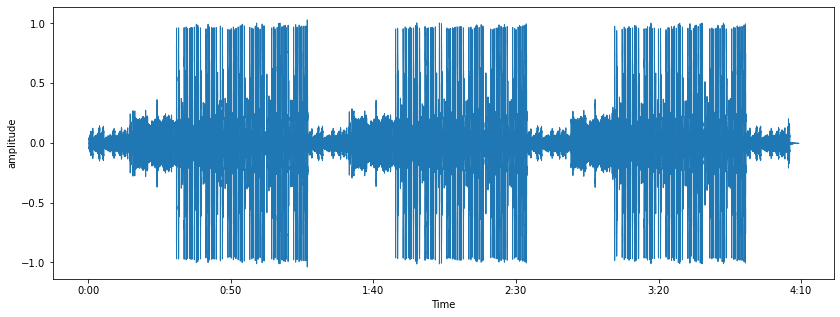

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
print('在時域上的波形')
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)
plt.ylabel('amplitude')
plt.show()

畫出時變的頻譜圖，顏色代表分貝(聲音的響度)


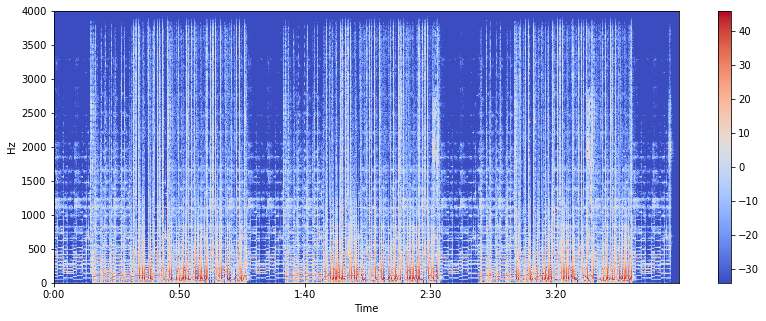

In [15]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
# 把幅度轉成分貝格式
print('畫出時變的頻譜圖，顏色代表分貝(聲音的響度)')
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()
plt.show()

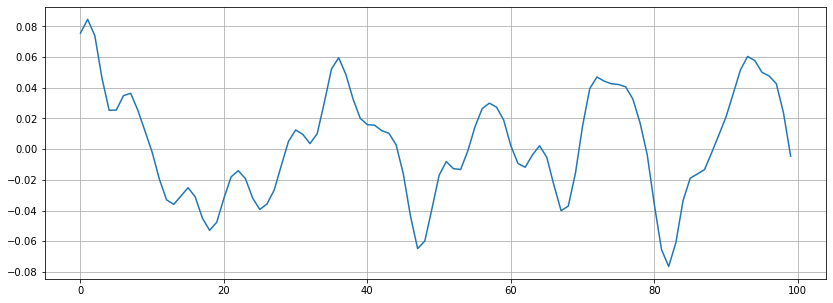

In [16]:
n0 = 9000
n1 = 9100
print('把某個時間放大來看')
plt.figure(figsize=(14, 5))
plt.plot(x[n0:n1])
plt.grid()

In [18]:
zero_crossings = librosa.zero_crossings(x[n0:n1], pad=False)
print('有%d個過零點(Zero Crossing Rate,ZCR).' % sum(zero_crossings))

有11個過零點(Zero Crossing Rate,ZCR)


C:\Users\jiao\AppData\Local\Temp/ipykernel_4368/1376047298.py:3: FutureWarning: Pass y=[0.         0.         0.         ... 0.02555141 0.01662961 0.00388394] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_centroids = librosa.feature.spectral_centroid(x[:80000], sr=sr)[0]


每偵的頻譜中心(spectral centroid)和時域上的波型


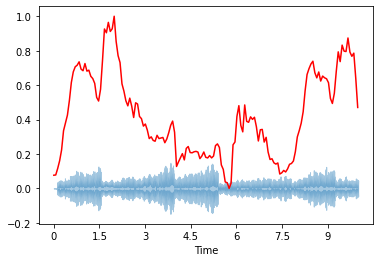

In [28]:
#spectral centroid -- centre of mass -- weighted mean of the frequencies present in the sound
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(x[:80000], sr=sr)[0]
# Computing the time variable for visualization
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames, sr=8000)
# Normalising the spectral centroid for visualisation
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)
print('每偵的頻譜中心(spectral centroid)和時域上的波型')
#Plotting the Spectral Centroid along the waveform
librosa.display.waveshow(x[:80000], sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')
plt.show()

C:\Users\jiao\AppData\Local\Temp/ipykernel_4368/1403715813.py:1: FutureWarning: Pass y=[0.         0.         0.         ... 0.02555141 0.01662961 0.00388394] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  spectral_rolloff = librosa.feature.spectral_rolloff(x[:80000], sr=sr)[0]


每一偵的頻譜滾降點(spectral rolloff)


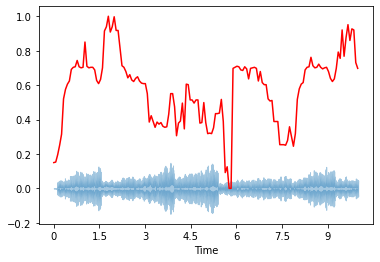

In [32]:
spectral_rolloff = librosa.feature.spectral_rolloff(x[:80000], sr=sr)[0]
print('每一偵的頻譜滾降點(spectral rolloff)')
librosa.display.waveshow(x[:80000], sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')
plt.show()

shape of MFCC (20, 3892)


C:\Users\jiao\AppData\Local\Temp/ipykernel_4368/1152004112.py:1: FutureWarning: Pass y=[0. 0. 0. ... 0. 0. 0.] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfccs = librosa.feature.mfcc(x, sr=sr)


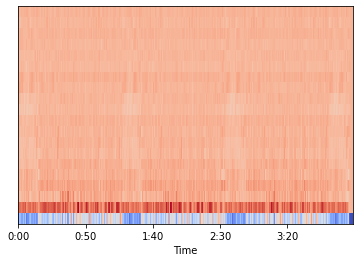

In [34]:
mfccs = librosa.feature.mfcc(x, sr=sr)
print('shape of MFCC',mfccs.shape)
#Displaying the MFCCs:
librosa.display.specshow(mfccs, sr=sr, x_axis='time')